In [173]:
from hockey_rink import NHLRink, RinkImage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm



In [190]:

all_players = pd.read_csv("skaters_2023.csv")
ages = pd.read_csv("player_ages_22.csv")
mult_teams = pd.read_csv("split_times_2023.csv")
goals = pd.read_csv("goals_2023.csv")
#all data is from Natural Stat Trick

In [191]:
ages.query('Player == "Jake DeBrusk"')

,Player,Team,Position,Age,draft_year,draft_team,draft_round,round_pick,overall_pick
388,Jake DeBrusk,BOS,L,27,2015,BOS,1,14,14


In [89]:
individual_stats = all_players[['Player', 'CF', 'CA', 'GF', 'GA', 'GF%', 'xGF', 'xGA', 'HDGF%', 'PDO']]
goals = goals[['Player', 'Goals', 'Total Assists', 'First Assists', 'Second Assists', 'Total Points', 'IPP', 'Shots', 'SH%', 'ixG', 'iCF', 'iHDCF', 'Rush Attempts','Rebounds Created', 'Giveaways', 'Takeaways', 'Hits', 'Hits Taken', 'Shots Blocked', 'Faceoffs %']]
player_stats = goals.merge(individual_stats, on="Player")
player_stats.head()

,Player,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iHDCF,Rush Attempts,Rebounds Created,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,CF,CA,GF,GA,GF%,xGF,xGA,HDGF%,PDO
0,Connor McDavid,64,89,60,29,153,80.53,352,18.18,43.97,529,164,18,36,77,82,89,108,37,51.93,2240,1520,190,90,67.86,159.54,84.90,65.03,1.047
1,Leon Draisaitl,52,76,60,16,128,70.72,247,21.05,31.95,423,100,7,36,102,77,66,134,36,54.90,2071,1436,181,101,64.18,144.22,82.75,62.50,1.028
2,Nikita Kucherov,30,83,48,35,113,76.87,271,11.07,27.78,545,89,14,54,98,57,61,107,6,100.00,2082,1340,147,91,61.76,127.64,80.74,62.73,1.016
3,David Pastrnak,61,52,31,21,113,78.47,407,14.99,40.17,727,120,19,51,109,52,91,130,31,42.11,1909,1261,144,58,71.29,119.68,64.56,67.37,1.053
4,Nathan MacKinnon,42,69,42,27,111,76.03,366,11.48,32.26,629,99,16,36,47,43,53,73,33,44.43,2086,1251,146,66,68.87,117.29,67.80,68.87,1.041


In [90]:
ages['Age'] = pd.to_numeric(ages['Age'])


ages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              951 non-null    int64 
 1   Player                  951 non-null    object
 2   Team                    951 non-null    object
 3   Position                951 non-null    object
 4   Age                     951 non-null    int64 
 5   Date of Birth           951 non-null    object
 6   Birth City              951 non-null    object
 7   Birth State/Province    683 non-null    object
 8   Birth Country           951 non-null    object
 9   Nationality             947 non-null    object
 10  Height (in)             951 non-null    int64 
 11  Weight (lbs)            951 non-null    int64 
 12  Draft Year              951 non-null    object
 13  Draft Team              951 non-null    object
 14  Draft Round             951 non-null    object
 15  Round 

In [91]:
all_players.head()

,Unnamed: 0,Player,Team,Position,GP,TOI,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %
0,430,Cole Bardreau,NYI,C,1,6.616667,8,1,88.89,5,0,100.00,4,0,100.00,0,0,-,0.16,0.00,100.00,4,0,100.00,1,0,100.00,0,0,-,3,0,100.00,0,0,-,4,1,80.00,0,0,-,0.00,-,0.000,0,1,1,8,0.00,0,2,1,0.00
1,917,Matt Coronato,CGY,R,1,14.633333,28,9,75.68,18,6,75.00,15,4,78.95,1,0,100.00,0.75,0.57,56.85,12,4,75.00,2,0,100.00,0,0,-,10,4,71.43,0,0,-,12,4,75.00,1,0,100.00,6.67,100.00,1.067,2,3,0,13,100.00,10,5,2,83.33
2,419,Ondrej Kase,CAR,R,1,11.033333,26,9,74.29,21,8,72.41,9,6,60.00,0,0,-,1.18,0.35,76.91,8,4,66.67,4,1,80.00,0,0,-,4,3,57.14,0,0,-,17,2,89.47,0,0,-,0.00,100.00,1.000,10,2,3,5,76.92,15,3,4,78.95
3,61,Max Pacioretty,CAR,L,5,68.216667,109,44,71.24,79,32,71.17,47,24,66.20,3,2,60.00,5.56,4.00,58.17,48,17,73.85,21,8,72.41,1,2,33.33,27,9,75.00,2,0,100.00,56,21,72.73,0,0,-,6.38,91.67,0.980,24,15,4,39,85.71,34,21,14,70.83
4,585,Lucas Carlsson,FLA,D,2,20.183333,28,12,70.00,14,10,58.33,9,7,56.25,0,1,0.00,0.72,0.41,63.54,10,6,62.50,3,3,50.00,0,1,0.00,7,3,70.00,0,0,-,15,5,75.00,0,0,-,0.00,85.71,0.857,4,4,1,21,80.00,7,10,7,50.00


In [92]:
#All Players usage to calculate the overall percentile
all_toi = all_players[['Player', 'Team','Position', 'GP', 'TOI']]
all_toi = all_toi.query('GP>=30')
all_toi['TOI'] = round(all_toi['TOI'],2)
all_toi.head()

,Player,Team,Position,GP,TOI
6,Stefan Noesen,CAR,R,78,961.93
10,Matthew Tkachuk,FLA,L,79,1614.43
12,Andrei Svechnikov,CAR,R,64,1155.08
14,Jack Drury,CAR,C,38,409.83
16,Jesper Bratt,N.J,L,82,1424.13


In [93]:
ages=ages[['Player','Team','Position', 'Age']]
ages.head()

,Player,Team,Position,Age
0,A.J. Greer,BOS,L,27
1,Aaron Ekblad,FLA,D,28
2,Aatu Raty,"NYI, VAN",C,21
3,Adam Beckman,MIN,L,23
4,Adam Boqvist,CBJ,D,23


In [94]:
#add in player ages
all_toi = all_toi.merge(ages, on= ('Player', 'Position'), how = 'left' )
all_toi=all_toi.rename(columns={'Team_x': 'Team'})
all_toi.drop(columns=['Team_y'], inplace=True)
all_toi.head()

,Player,Team,Position,GP,TOI,Age
0,Stefan Noesen,CAR,R,78,961.93,31.0
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0
3,Jack Drury,CAR,C,38,409.83,24.0
4,Jesper Bratt,N.J,L,82,1424.13,25.0


In [95]:
#redefine the dataframe
all_toi = all_toi[['Player', 'Team', 'Position', 'GP', 'TOI', 'Age']]
all_toi.head()

,Player,Team,Position,GP,TOI,Age
0,Stefan Noesen,CAR,R,78,961.93,31.0
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0
3,Jack Drury,CAR,C,38,409.83,24.0
4,Jesper Bratt,N.J,L,82,1424.13,25.0


In [96]:
all_toi.query('Player == "Noah Hanifin"')

,Player,Team,Position,GP,TOI,Age
225,Noah Hanifin,CGY,D,81,1833.98,27.0


In [97]:
all_toi.query('Player == "Sebastian Aho"')

,Player,Team,Position,GP,TOI,Age
16,Sebastian Aho,CAR,C,75,1462.17,26.0
253,Sebastian Aho,NYI,D,71,1190.70,28.0


In [98]:
#Total TOI Percentile
all_toi['total_percentile'] = all_toi['TOI'].rank(pct=True)
all_toi['Skater']=np.where(all_toi['Position'] == "D", "D", "F")
all_toi.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F


In [99]:
#I need to pull out the multi-team players first
multi_teams = all_toi.query('Team.str.contains(",")')
multi_teams = multi_teams.explode('Team').reset_index(drop=True)
multi_teams.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater
0,Timo Meier,"N.J, S.J",R,78,1512.28,27.0,0.810030,F
1,Eeli Tolvanen,"NSH, SEA",R,61,885.50,25.0,0.311550,F
2,Nino Niederreiter,"NSH, WPG",R,78,1270.37,31.0,0.586626,F
3,Tyler Bertuzzi,"BOS, DET",L,50,824.42,29.0,0.262918,F
4,Erik Gustafsson,"TOR, WSH",D,70,1384.10,32.0,0.697568,D


In [100]:
#test
multi_teams.query('Player == "Noah Hanifin"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater


In [101]:
#redefine the data frame
mult_teams = mult_teams[['Player', 'Team', 'GP', 'TOI']]
mult_teams.head()

,Player,Team,GP,TOI
0,Cole Bardreau,NYI,1,6.616667
1,Matt Coronato,CGY,1,14.633333
2,Ondrej Kase,CAR,1,11.033333
3,Max Pacioretty,CAR,5,68.216667
4,Lucas Carlsson,FLA,2,20.183333


In [102]:
#drop those players that appear only once, keeping all duplicates
mult_teams = mult_teams[mult_teams.duplicated('Player', keep=False)]
mult_teams=mult_teams.sort_values(by=['Player', 'GP'], ascending=[True, False]).reset_index()
mult_teams=mult_teams.drop('index', axis = 1)
mult_teams.head()


,Player,Team,GP,TOI
0,Aatu Raty,NYI,12,105.166667
1,Aatu Raty,VAN,3,20.533333
2,Anders Bjork,CHI,13,183.950000
3,Anders Bjork,BUF,1,9.633333
4,Andreas Englund,COL,36,405.466667


In [103]:
mult_teams.query('Player == "Noah Hanifin"')

,Player,Team,GP,TOI


In [104]:
#Creating a new df of just the multi team players with their total TOI and overal percentile.
multi_teams = multi_teams.merge(mult_teams, on = "Player", how = "left")
multi_teams.head()

,Player,Team_x,Position,GP_x,TOI_x,Age,total_percentile,Skater,Team_y,GP_y,TOI_y
0,Timo Meier,"N.J, S.J",R,78,1512.28,27.0,0.810030,F,S.J,57,1138.666667
1,Timo Meier,"N.J, S.J",R,78,1512.28,27.0,0.810030,F,N.J,21,373.616667
2,Eeli Tolvanen,"NSH, SEA",R,61,885.50,25.0,0.311550,F,SEA,48,718.883333
3,Eeli Tolvanen,"NSH, SEA",R,61,885.50,25.0,0.311550,F,NSH,13,166.616667
4,Nino Niederreiter,"NSH, WPG",R,78,1270.37,31.0,0.586626,F,NSH,56,898.433333


In [105]:
multi_teams = multi_teams[['Player', 'Team_y', 'Position', 'GP_x', 'GP_y', 'TOI_x', 'TOI_y', 'Age', 'total_percentile', 'Skater' ]]
multi_teams=multi_teams.rename(columns={'Team_y': 'Team',
                                       'TOI_x':'TOI', 'TOI_y':'team_TOI', 'GP_x':'GP', 'GP_y':'team_gp'})
multi_teams.head()

,Player,Team,Position,GP,team_gp,TOI,team_TOI,Age,total_percentile,Skater
0,Timo Meier,S.J,R,78,57,1512.28,1138.666667,27.0,0.810030,F
1,Timo Meier,N.J,R,78,21,1512.28,373.616667,27.0,0.810030,F
2,Eeli Tolvanen,SEA,R,61,48,885.50,718.883333,25.0,0.311550,F
3,Eeli Tolvanen,NSH,R,61,13,885.50,166.616667,25.0,0.311550,F
4,Nino Niederreiter,NSH,R,78,56,1270.37,898.433333,31.0,0.586626,F


In [106]:
#all of the players who did not move this season
single_teams = all_toi.query('~Team.str.contains(",")')
single_teams.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F


In [107]:
#checking for a multi-team player
single_teams.query('Player == "Elias Lindholm"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater
109,Elias Lindholm,CGY,C,80,1492.12,29.0,0.790274,F


In [108]:
#join the multi team players back in 
all_players = single_teams.append(multi_teams, ignore_index=True)
all_players.head()

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_19412\12173719.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_players = single_teams.append(multi_teams, ignore_index=True)


,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,NaN,NaN
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,NaN,NaN
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,NaN,NaN
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,NaN,NaN
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,NaN,NaN


In [109]:
#replace the null values in team_gp and team_TOI with the games played and TOI for single team players
all_players['team_TOI'] = np.where(pd.isnull(all_players['team_TOI']), all_players['TOI'], all_players['team_TOI'])
all_players['team_gp'] = np.where(pd.isnull(all_players['team_gp']), all_players['GP'], all_players['team_gp'])

In [110]:
#test
all_players.query('Player == "Elias Lindholm"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI
105,Elias Lindholm,CGY,C,80,1492.12,29.0,0.790274,F,80.0,1492.12


In [111]:
#Quality of Team - Rank Among Forwards rank among teams first 

def calculate_percentile_rank(player_time_on_ice, player_position, player_team):
    # Assuming you have a DataFrame called `all_players` containing player data
    
    # Filter data based on player position and team
    filtered_data = all_players[(all_players["Skater"] == "F") & (all_players["Team"] == player_team)]
    
    # Extract time on ice values for the specific player position and team
    forwards_time_on_ice = filtered_data["team_TOI"]
    percentile_rank = None
    
    if player_position == "D":
        percentile_rank = stats.percentileofscore(forwards_time_on_ice, player_time_on_ice)
    elif player_position == "F":
        percentile_rank = stats.percentileofscore(forwards_time_on_ice, player_time_on_ice)

    # Calculate the percentile rank
    return percentile_rank

all_players["QoTF"] = all_players.apply(lambda row: calculate_percentile_rank(row["team_TOI"], row["Skater"], row["Team"]), axis=1)
all_players.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667


In [112]:
#Quality of Team - Rank Among Defensemen

def calculate_percentile_rank(player_time_on_ice, player_position, player_team):
    # Assuming you have a DataFrame called `all_players` containing player data
    
    # Filter data based on player position and team
    filtered_data = all_players[(all_players["Skater"] == "D") & (all_players["Team"] == player_team)]
    
    # Extract time on ice values for the specific player position and team
    defense_time_on_ice = filtered_data["team_TOI"]
    percentile_rank = None
    
    if player_position == "F":
        percentile_rank = stats.percentileofscore(defense_time_on_ice, player_time_on_ice)
    elif player_position == "D":
        percentile_rank = stats.percentileofscore(defense_time_on_ice, player_time_on_ice)

    # Calculate the percentile rank
    return percentile_rank

all_players["QoTD"] = all_players.apply(lambda row: calculate_percentile_rank(row["team_TOI"], row["Skater"], row["Team"]), axis=1)
all_players.head()


,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143


In [113]:
all_players.query('Player == "Elias Lindholm"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD
105,Elias Lindholm,CGY,C,80,1492.12,29.0,0.790274,F,80.0,1492.12,100.0,50.0


In [114]:
# Identify the specific name to keep - in future need to use name/age in case there are other players like this
name_to_keep = 'Sebastian Aho'

# Filter out the specific name from duplicates
duplicates_except_specific = all_players[all_players['Player'] != name_to_keep]

# Identify the duplicated player names
duplicated_names = duplicates_except_specific[duplicates_except_specific.duplicated(subset='Player')]['Player']

# Create a DataFrame of duplicated player names except for the specific name
result_df = all_players[all_players['Player'].isin(duplicated_names)]
result_df.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD
574,Timo Meier,S.J,R,78,1512.28,27.0,0.810030,F,57.0,1138.666667,82.352941,50.000000
575,Timo Meier,N.J,R,78,1512.28,27.0,0.810030,F,21.0,373.616667,13.333333,0.000000
576,Eeli Tolvanen,SEA,R,61,885.50,25.0,0.311550,F,48.0,718.883333,14.285714,14.285714
577,Eeli Tolvanen,NSH,R,61,885.50,25.0,0.311550,F,13.0,166.616667,5.555556,0.000000
578,Nino Niederreiter,NSH,R,78,1270.37,31.0,0.586626,F,56.0,898.433333,72.222222,37.500000


In [115]:
#Test to make sure that Aho didn't get removed
result_df.query('Player == "Sebasitan Aho"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD


In [116]:
result_df.query('Player == "Elias Lindholm"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD


In [117]:
#Adding a column to identify the team that the player started with and then ended with
result_df['team_no'] = result_df.groupby('Player').cumcount()+1
result_df.head()

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_19412\722589994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['team_no'] = result_df.groupby('Player').cumcount()+1


,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,team_no
574,Timo Meier,S.J,R,78,1512.28,27.0,0.810030,F,57.0,1138.666667,82.352941,50.000000,1
575,Timo Meier,N.J,R,78,1512.28,27.0,0.810030,F,21.0,373.616667,13.333333,0.000000,2
576,Eeli Tolvanen,SEA,R,61,885.50,25.0,0.311550,F,48.0,718.883333,14.285714,14.285714,1
577,Eeli Tolvanen,NSH,R,61,885.50,25.0,0.311550,F,13.0,166.616667,5.555556,0.000000,2
578,Nino Niederreiter,NSH,R,78,1270.37,31.0,0.586626,F,56.0,898.433333,72.222222,37.500000,1


In [118]:
# Pivot the DataFrame to reshape it and include TOI
pivoted_df = result_df.pivot(index='Player', columns='team_no', values=['Team', 'team_TOI'])

# Rename columns to 'Team 1', 'Team 2', 'TOI Team 1', 'TOI Team 2', ...
pivoted_df.columns = [f'{col[0]} {col[1]}' for col in pivoted_df.columns]

# Reset index to make 'Player' a column again
pivoted_df.reset_index(inplace=True)


In [119]:
pivoted_df = pivoted_df.fillna(0)
pivoted_df.head()

,Player,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3
0,Andreas Englund,COL,CHI,0,405.466667,163.766667,0.0
1,Anthony Beauvillier,NYI,VAN,0,773.566667,560.300000,0.0
2,Bo Horvat,VAN,NYI,0,1019.683333,611.983333,0.0
3,Brendan Lemieux,L.A,PHI,0,229.400000,228.766667,0.0
4,Brett Ritchie,CGY,ARI,0,319.716667,182.800000,0.0


In [120]:
#append the multiple players to the all_players table
all_players = all_players.merge(pivoted_df, on="Player", how = "left")
all_players.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
all_players.query('Player == "Elias Lindholm"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3
105,Elias Lindholm,CGY,C,80,1492.12,29.0,0.790274,F,80.0,1492.12,100.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
#Quality of Competition, Forwards
def calculate_percentile_rank(player_row, player_position):
    # Filter data based on player position and exclude rows where player's team matches
    filtered_data = all_players[
        (all_players["Skater"] == "F") & 
        (all_players["Player"] != player_row["Player"]) & 
        (all_players["Team"] != player_row["Team"])
    ]
    
    # Group by player name and calculate mean TOI
    grouped_data = filtered_data.groupby("Player")["team_TOI"].mean()
    
    # Calculate percentile rank
    percentile_rank = stats.percentileofscore(grouped_data, player_row["team_TOI"])
    
    return percentile_rank

# Calculate the percentile ranks for each player
all_players["QoCF"] = all_players.apply(lambda row: calculate_percentile_rank(row, row["Skater"]), axis=1)
all_players.head()


,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN,49.292453
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.009390
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,60.849057
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,8.018868
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,84.235294


In [123]:
#Quality of Competition, Defense
def calculate_percentile_rank(player_row, player_position):
    # Filter data based on player position and exclude rows where player's team matches
    filtered_data = all_players[
        (all_players["Skater"] == "D") & 
        (all_players["Player"] != player_row["Player"]) & 
        (all_players["Team"] != player_row["Team"])
    ]
    
    # Group by player name and calculate mean TOI
    grouped_data = filtered_data.groupby("Player")["team_TOI"].mean()
    
    # Calculate percentile rank
    percentile_rank = stats.percentileofscore(grouped_data, player_row["team_TOI"])
    
    return percentile_rank

# Calculate the percentile ranks for each player
all_players["QoCD"] = all_players.apply(lambda row: calculate_percentile_rank(row, row["Skater"]), axis=1)
all_players.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN,49.292453,31.162791
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.009390,75.348837
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,60.849057,40.000000
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,8.018868,3.720930
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,84.235294,59.345794


In [124]:
all_players['team_no'] = all_players.groupby('Player').cumcount()+1
all_players.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN,49.292453,31.162791,1
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.009390,75.348837,1
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,60.849057,40.000000,1
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,8.018868,3.720930,1
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,84.235294,59.345794,1


In [125]:
all_players['team_count'] = np.where(pd.isnull(all_players['Team 1']), all_players['Team'], "Multi")
all_players.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN,49.292453,31.162791,1,CAR
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.009390,75.348837,1,FLA
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,60.849057,40.000000,1,CAR
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,8.018868,3.720930,1,CAR
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,84.235294,59.345794,1,N.J


In [126]:
all_players.query('Player == "Elias Lindholm"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count
105,Elias Lindholm,CGY,C,80,1492.12,29.0,0.790274,F,80.0,1492.12,100.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,87.558685,65.581395,1,CGY


In [127]:
#pull out the multi team players again to pivot
mult_team_quals = all_players.query('team_count == "Multi"')
mult_team_quals.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count
574,Timo Meier,S.J,R,78,1512.28,27.0,0.810030,F,57.0,1138.666667,82.352941,50.000000,S.J,N.J,0,1138.666667,373.616667,0.0,58.823529,39.814815,1,Multi
575,Timo Meier,N.J,R,78,1512.28,27.0,0.810030,F,21.0,373.616667,13.333333,0.000000,S.J,N.J,0,1138.666667,373.616667,0.0,6.367925,2.803738,2,Multi
576,Eeli Tolvanen,SEA,R,61,885.50,25.0,0.311550,F,48.0,718.883333,14.285714,14.285714,SEA,NSH,0,718.883333,166.616667,0.0,31.839623,18.604651,1,Multi
577,Eeli Tolvanen,NSH,R,61,885.50,25.0,0.311550,F,13.0,166.616667,5.555556,0.000000,SEA,NSH,0,718.883333,166.616667,0.0,0.709220,0.000000,2,Multi
578,Nino Niederreiter,NSH,R,78,1270.37,31.0,0.586626,F,56.0,898.433333,72.222222,37.500000,NSH,WPG,0,898.433333,371.933333,0.0,43.262411,27.314815,1,Multi


In [128]:
#determine toi rate for time on team - based on atoi and skater position?
mult_team_quals['team_ATOI'] = mult_team_quals['team_TOI']/mult_team_quals['team_gp']
mult_team_quals

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_19412\646357520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_team_quals['team_ATOI'] = mult_team_quals['team_TOI']/mult_team_quals['team_gp']


,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,team_ATOI
574,Timo Meier,S.J,R,78,1512.28,27.0,0.810030,F,57.0,1138.666667,82.352941,50.000000,S.J,N.J,0,1138.666667,373.616667,0.0,58.823529,39.814815,1,Multi,19.976608
575,Timo Meier,N.J,R,78,1512.28,27.0,0.810030,F,21.0,373.616667,13.333333,0.000000,S.J,N.J,0,1138.666667,373.616667,0.0,6.367925,2.803738,2,Multi,17.791270
576,Eeli Tolvanen,SEA,R,61,885.50,25.0,0.311550,F,48.0,718.883333,14.285714,14.285714,SEA,NSH,0,718.883333,166.616667,0.0,31.839623,18.604651,1,Multi,14.976736
577,Eeli Tolvanen,NSH,R,61,885.50,25.0,0.311550,F,13.0,166.616667,5.555556,0.000000,SEA,NSH,0,718.883333,166.616667,0.0,0.709220,0.000000,2,Multi,12.816667
578,Nino Niederreiter,NSH,R,78,1270.37,31.0,0.586626,F,56.0,898.433333,72.222222,37.500000,NSH,WPG,0,898.433333,371.933333,0.0,43.262411,27.314815,1,Multi,16.043452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,Nikita Zaitsev,CHI,D,46,757.33,32.0,0.215805,D,18.0,275.033333,0.000000,22.222222,OTT,CHI,0,482.300000,275.033333,0.0,3.521127,0.465116,2,Multi,15.279630
740,Dmitry Kulikov,ANA,D,67,1304.77,33.0,0.618541,D,61.0,1232.733333,73.333333,62.500000,ANA,PIT,0,1232.733333,72.033333,0.0,66.273585,45.116279,1,Multi,20.208743
741,Dmitry Kulikov,PIT,D,67,1304.77,33.0,0.618541,D,6.0,72.033333,6.250000,12.500000,ANA,PIT,0,1232.733333,72.033333,0.0,0.000000,0.000000,2,Multi,12.005556
742,Jayson Megna,ANA,C,55,550.23,34.0,0.085106,F,41.0,448.133333,13.333333,12.500000,ANA,COL,0,448.133333,102.100000,0.0,10.638298,4.629630,1,Multi,10.930081


In [129]:
#pivot the multiple percentiles
mult_team_quals['team_no'] = mult_team_quals.groupby('Player').cumcount()+1

# Pivot the DataFrame to reshape it and include QoC
pivot_competition_f = mult_team_quals.pivot(index='Player', columns='team_no', values=['Team',  'team_TOI', 'QoCF', 'QoTF'])
pivot_competition_d =  mult_team_quals.pivot(index='Player', columns='team_no', values=['Team','team_TOI', 'QoCD','QoTD'])


# Rename columns to 'Team 1', 'Team 2', 'TOI Team 1', 'TOI Team 2', ...
pivot_competition_f.columns = [f'{col[0]} {col[1]}' for col in pivot_competition_f.columns]
pivot_competition_d.columns = [f'{col[0]} {col[1]}' for col in pivot_competition_d.columns]

# Reset index to make 'Player' a column again
pivot_competition_f.reset_index(inplace=True)
pivot_competition_d.reset_index(inplace=True)


C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_19412\1539240382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_team_quals['team_no'] = mult_team_quals.groupby('Player').cumcount()+1


In [130]:
pivot_competition_f = pivot_competition_f.fillna(0)
pivot_competition_f.head()

,Player,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF 1,QoCF 2,QoCF 3,QoTF 1,QoTF 2,QoTF 3
0,Andreas Englund,COL,CHI,0,405.466667,163.766667,0.0,7.259953,0.938967,0.0,41.176471,0.000000,0.0
1,Anthony Beauvillier,NYI,VAN,0,773.566667,560.300000,0.0,34.751773,18.823529,0.0,43.750000,37.500000,0.0
2,Bo Horvat,VAN,NYI,0,1019.683333,611.983333,0.0,51.764706,21.749409,0.0,68.750000,37.500000,0.0
3,Brendan Lemieux,L.A,PHI,0,229.400000,228.766667,0.0,1.895735,2.352941,0.0,12.500000,6.666667,0.0
4,Brett Ritchie,CGY,ARI,0,319.716667,182.800000,0.0,4.705882,0.705882,0.0,15.384615,7.142857,0.0


In [131]:
pivot_competition_d = pivot_competition_d.fillna(0)
pivot_competition_d = pivot_competition_d[['Player', 'QoCD 1', 'QoCD 2', 'QoCD 3', 'QoTD 1', 'QoTD 2', 'QoTD 3'  ]]
pivot_competition_d.head()

,Player,QoCD 1,QoCD 2,QoCD 3,QoTD 1,QoTD 2,QoTD 3
0,Andreas Englund,2.347418,0.000000,0.0,30.0,11.111111,0.0
1,Anthony Beauvillier,21.860465,9.259259,0.0,0.0,25.000000,0.0
2,Bo Horvat,32.870370,11.627907,0.0,50.0,0.000000,0.0
3,Brendan Lemieux,0.465116,0.467290,0.0,0.0,0.000000,0.0
4,Brett Ritchie,0.930233,0.462963,0.0,25.0,0.000000,0.0


In [132]:
#Join the two together
weighted_df= pivot_competition_f.merge(pivot_competition_d, on="Player")
weighted_df.head()

,Player,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF 1,QoCF 2,QoCF 3,QoTF 1,QoTF 2,QoTF 3,QoCD 1,QoCD 2,QoCD 3,QoTD 1,QoTD 2,QoTD 3
0,Andreas Englund,COL,CHI,0,405.466667,163.766667,0.0,7.259953,0.938967,0.0,41.176471,0.000000,0.0,2.347418,0.000000,0.0,30.0,11.111111,0.0
1,Anthony Beauvillier,NYI,VAN,0,773.566667,560.300000,0.0,34.751773,18.823529,0.0,43.750000,37.500000,0.0,21.860465,9.259259,0.0,0.0,25.000000,0.0
2,Bo Horvat,VAN,NYI,0,1019.683333,611.983333,0.0,51.764706,21.749409,0.0,68.750000,37.500000,0.0,32.870370,11.627907,0.0,50.0,0.000000,0.0
3,Brendan Lemieux,L.A,PHI,0,229.400000,228.766667,0.0,1.895735,2.352941,0.0,12.500000,6.666667,0.0,0.465116,0.467290,0.0,0.0,0.000000,0.0
4,Brett Ritchie,CGY,ARI,0,319.716667,182.800000,0.0,4.705882,0.705882,0.0,15.384615,7.142857,0.0,0.930233,0.462963,0.0,25.0,0.000000,0.0


In [133]:
weighted_df.query('Player == "Elias Lindholm"')

,Player,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF 1,QoCF 2,QoCF 3,QoTF 1,QoTF 2,QoTF 3,QoCD 1,QoCD 2,QoCD 3,QoTD 1,QoTD 2,QoTD 3


In [134]:
#Weighted QoC = (QoC_Team1 * TOI_Team1 + QoC_Team2 * TOI_Team2 + ...) / Total_TOI
weighted_df['w_QoCF'] = ((weighted_df['QoCF 1']*weighted_df['team_TOI 1'])+(weighted_df['QoCF 2']*weighted_df['team_TOI 2'])
                         +(weighted_df['QoCF 3']*weighted_df['team_TOI 3']))/(weighted_df['team_TOI 1']+weighted_df['team_TOI 2']+weighted_df['team_TOI 3'])
weighted_df['w_QoCD'] =  ((weighted_df['QoCD 1']*weighted_df['team_TOI 1'])+(weighted_df['QoCD 2']*weighted_df['team_TOI 2'])
                         +(weighted_df['QoCD 3']*weighted_df['team_TOI 3']))/(weighted_df['team_TOI 1']+weighted_df['team_TOI 2']+weighted_df['team_TOI 3'])
weighted_df['w_QoTF'] = ((weighted_df['QoTF 1']*weighted_df['team_TOI 1'])+(weighted_df['QoTF 2']*weighted_df['team_TOI 2'])
                         +(weighted_df['QoTF 3']*weighted_df['team_TOI 3']))/(weighted_df['team_TOI 1']+weighted_df['team_TOI 2']+weighted_df['team_TOI 3'])
weighted_df['w_QoTD'] =  ((weighted_df['QoTD 1']*weighted_df['team_TOI 1'])+(weighted_df['QoTD 2']*weighted_df['team_TOI 2'])
                         +(weighted_df['QoTD 3']*weighted_df['team_TOI 3']))/(weighted_df['team_TOI 1']+weighted_df['team_TOI 2']+weighted_df['team_TOI 3'])

weighted_df = weighted_df[['Player', 'w_QoCF', 'w_QoCD','w_QoTF', 'w_QoTD']]
weighted_df.head()

,Player,w_QoCF,w_QoCD,w_QoTF,w_QoTD
0,Andreas Englund,5.441425,1.672073,29.330128,24.565725
1,Anthony Beauvillier,28.061003,16.567241,41.124644,10.501424
2,Bo Horvat,40.506977,24.903036,57.029175,31.246680
3,Brendan Lemieux,2.124022,0.466201,9.587365,0.000000
4,Brett Ritchie,3.250806,0.760254,12.386519,15.905774


In [135]:
all_players.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN,49.292453,31.162791,1,CAR
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.009390,75.348837,1,FLA
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,60.849057,40.000000,1,CAR
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,8.018868,3.720930,1,CAR
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,84.235294,59.345794,1,N.J


In [136]:
# Identify the specific name to keep (the one with two different players)
name_to_keep = 'Sebastian Aho'

# Create a mask to keep the first occurrence of all player names except for the specific name
mask = all_players['Player'] != name_to_keep
filtered_players = all_players[mask].drop_duplicates(subset='Player', keep='first')

# Append the rows with the specific name to the filtered DataFrame
filtered_players = filtered_players.append(all_players[all_players['Player'] == name_to_keep])
filtered_players.head()

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_19412\1040420341.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_players = filtered_players.append(all_players[all_players['Player'] == name_to_keep])


,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN,49.292453,31.162791,1,CAR
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.009390,75.348837,1,FLA
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,60.849057,40.000000,1,CAR
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,8.018868,3.720930,1,CAR
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,84.235294,59.345794,1,N.J


In [137]:
filtered_players.query('Player == "Sebastian Aho"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count
16,Sebastian Aho,CAR,C,75,1462.17,26.0,0.767477,F,75.0,1462.17,92.857143,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,86.320755,62.149533,1,CAR
232,Sebastian Aho,NYI,D,71,1190.70,28.0,0.521277,D,71.0,1190.70,75.000000,16.666667,NaN,NaN,NaN,NaN,NaN,NaN,62.647754,43.255814,2,NYI


In [138]:
player_usage = filtered_players.merge(weighted_df, on="Player", how = "left")
player_usage.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN,49.292453,31.162791,1,CAR,NaN,NaN,NaN,NaN
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.009390,75.348837,1,FLA,NaN,NaN,NaN,NaN
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,60.849057,40.000000,1,CAR,NaN,NaN,NaN,NaN
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,8.018868,3.720930,1,CAR,NaN,NaN,NaN,NaN
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,84.235294,59.345794,1,N.J,NaN,NaN,NaN,NaN


In [139]:
#player_usage2 = player_usage
player_usage['QoCF'] = np.where(pd.isnull(player_usage['w_QoCF']), player_usage['QoCF'], player_usage['w_QoCF'])
player_usage['QoCD'] = np.where(pd.isnull(player_usage['w_QoCD']), player_usage['QoCD'], player_usage['w_QoCD'])
player_usage['QoTF'] = np.where(pd.isnull(player_usage['w_QoTF']), player_usage['QoTF'], player_usage['w_QoTF'])
player_usage['QoTD'] = np.where(pd.isnull(player_usage['w_QoTD']), player_usage['QoTD'], player_usage['w_QoTD'])
player_usage.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN,49.292453,31.162791,1,CAR,NaN,NaN,NaN,NaN
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.009390,75.348837,1,FLA,NaN,NaN,NaN,NaN
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,60.849057,40.000000,1,CAR,NaN,NaN,NaN,NaN
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,8.018868,3.720930,1,CAR,NaN,NaN,NaN,NaN
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,84.235294,59.345794,1,N.J,NaN,NaN,NaN,NaN


In [140]:
player_usage.query('Player=="Elias Lindholm"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD
104,Elias Lindholm,CGY,C,80,1492.12,29.0,0.790274,F,80.0,1492.12,100.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,87.558685,65.581395,1,CGY,NaN,NaN,NaN,NaN


In [141]:
player_usage['total_percentile']= round(player_usage['total_percentile']*100,2)
# Specify the columns to round
columns_to_round = ['QoCF', 'QoCD', 'QoTF', 'QoTD', 'w_QoCF', 'w_QoCD', 'w_QoTF', 'w_QoTD', ]

# Round the specified columns to 2 decimal places
player_usage[columns_to_round] = player_usage[columns_to_round].apply(lambda x: round(x, 2))

player_usage.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD
0,Stefan Noesen,CAR,R,78,961.93,31.0,36.78,F,78.0,961.93,35.71,28.57,NaN,NaN,NaN,NaN,NaN,NaN,49.29,31.16,1,CAR,NaN,NaN,NaN,NaN
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,88.30,F,79.0,1614.43,92.31,50.00,NaN,NaN,NaN,NaN,NaN,NaN,96.01,75.35,1,FLA,NaN,NaN,NaN,NaN
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,49.70,F,64.0,1155.08,50.00,42.86,NaN,NaN,NaN,NaN,NaN,NaN,60.85,40.00,1,CAR,NaN,NaN,NaN,NaN
3,Jack Drury,CAR,C,38,409.83,24.0,2.58,F,38.0,409.83,14.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,8.02,3.72,1,CAR,NaN,NaN,NaN,NaN
4,Jesper Bratt,N.J,L,82,1424.13,25.0,74.32,F,82.0,1424.13,86.67,42.86,NaN,NaN,NaN,NaN,NaN,NaN,84.24,59.35,1,N.J,NaN,NaN,NaN,NaN


In [142]:
#Toughest Minutes 
tough_min = player_usage['QoCF']+player_usage['QoCD']+player_usage['QoTF']+player_usage['QoTD'] 
w_tough_min = player_usage['w_QoCF']+player_usage['w_QoCD']+player_usage['w_QoTF']+player_usage['w_QoTD'] 

player_usage['toughest_min'] = np.where(player_usage['team_count']=="Multi", w_tough_min,tough_min)


player_usage = player_usage.sort_values(['toughest_min', 'TOI'], ascending=[False, False]).reset_index(drop=True)

player_usage.head()

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min
0,Drew Doughty,L.A,D,81,2124.55,34.0,100.00,D,81.0,2124.55,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.00,1,L.A,NaN,NaN,NaN,NaN,400.00
1,Erik Karlsson,S.J,D,82,2100.43,34.0,99.85,D,82.0,2100.43,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,99.54,1,S.J,NaN,NaN,NaN,NaN,399.54
2,Miro Heiskanen,DAL,D,79,2013.80,24.0,99.70,D,79.0,2013.80,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,99.07,1,DAL,NaN,NaN,NaN,NaN,399.07
3,Rasmus Dahlin,BUF,D,78,2012.07,24.0,99.54,D,78.0,2012.07,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,98.60,1,BUF,NaN,NaN,NaN,NaN,398.60
4,Devon Toews,COL,D,80,2008.50,30.0,99.39,D,80.0,2008.50,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,98.13,1,COL,NaN,NaN,NaN,NaN,398.13


In [143]:
pd.set_option('display.max_columns',None)
player_usage.query('Player == "Noah Hanifin"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min
36,Noah Hanifin,CGY,D,81,1833.98,27.0,96.5,D,81.0,1833.98,100.0,87.5,NaN,NaN,NaN,NaN,NaN,NaN,99.77,90.23,1,CGY,NaN,NaN,NaN,NaN,377.5


In [144]:
player_usage['toughest_min'].median()

197.48

In [145]:
player_usage['toughest_min'].mean()

203.24828267477204

In [146]:
player_usage['toughest_min'].mode()

0     26.25
1    110.66
2    257.84
3    286.73
Name: toughest_min, dtype: float64

In [147]:
defense = player_usage.query('Skater == "D"')
defense['toughest_min'].mean()

249.88787330316742

In [148]:
#the median toughest minutes
defense['toughest_min'].median()

254.32999999999998

In [149]:
defense['toughest_min'].describe()

count    221.000000
mean     249.887873
std      108.295831
min       21.860000
25%      160.070000
50%      254.330000
75%      348.100000
max      400.000000
Name: toughest_min, dtype: float64

In [150]:
defense

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min
0,Drew Doughty,L.A,D,81,2124.55,34.0,100.00,D,81.0,2124.550000,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,100.00,1,L.A,NaN,NaN,NaN,NaN,400.00
1,Erik Karlsson,S.J,D,82,2100.43,34.0,99.85,D,82.0,2100.430000,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,99.54,1,S.J,NaN,NaN,NaN,NaN,399.54
2,Miro Heiskanen,DAL,D,79,2013.80,24.0,99.70,D,79.0,2013.800000,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,99.07,1,DAL,NaN,NaN,NaN,NaN,399.07
3,Rasmus Dahlin,BUF,D,78,2012.07,24.0,99.54,D,78.0,2012.070000,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,98.60,1,BUF,NaN,NaN,NaN,NaN,398.60
4,Devon Toews,COL,D,80,2008.50,30.0,99.39,D,80.0,2008.500000,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,98.13,1,COL,NaN,NaN,NaN,NaN,398.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,Scott Harrington,S.J,D,45,739.72,31.0,20.36,D,28.0,428.166667,16.43,19.74,S.J,ANA,0,428.166667,311.550000,0.0,7.59,2.74,1,Multi,7.59,2.74,16.43,19.74,46.50
618,Nikita Zaitsev,OTT,D,46,757.33,32.0,21.58,D,28.0,482.300000,8.49,23.99,OTT,CHI,0,482.300000,275.033333,0.0,9.82,2.25,1,Multi,9.82,2.25,8.49,23.99,44.55
620,Jacob MacDonald,COL,D,58,698.28,31.0,17.93,D,33.0,285.950000,23.53,11.48,COL,S.J,0,285.950000,412.333333,0.0,6.71,2.58,1,Multi,6.71,2.58,23.53,11.48,44.30
627,Cal Foote,T.B,D,50,756.12,25.0,21.43,D,26.0,369.200000,15.50,13.37,T.B,NSH,0,369.200000,386.916667,0.0,7.07,2.81,1,Multi,7.07,2.81,15.50,13.37,38.75


In [151]:
forward = player_usage.query('Skater == "F"')
forward['toughest_min'].mean()

179.6616704805492

In [152]:
forward['toughest_min'].median()

173.34

In [153]:
#rankings among all players
def calculate_percentile_rank(all_rank):
    
    percentile_rank = stats.percentileofscore(player_usage["toughest_min"], all_rank)
    return percentile_rank

all_rank = 1447.75 # Replace with the player's actual time on ice

percentile_rank = calculate_percentile_rank(all_rank)
print(f"The player's percentile rank among all players is: {percentile_rank}")


The player's percentile rank among all players is: 100.0


In [154]:
#rankings within defensemen - should this be looking at actual TOI or the toughest min?
def calculate_percentile_rank(d_rank):
    
    percentile_rank = stats.percentileofscore(defense["toughest_min"], d_rank)
    return percentile_rank

d_rank = 294.61 # Replace with the player's actual time on ice?

percentile_rank = calculate_percentile_rank(d_rank)
print(f"The player's percentile rank among all players is: {percentile_rank}")

    

The player's percentile rank among all players is: 57.918552036199095


(array([13., 11., 18., 20., 21., 24., 17., 24., 29., 44.]),
 array([ 21.86 ,  59.674,  97.488, 135.302, 173.116, 210.93 , 248.744,
        286.558, 324.372, 362.186, 400.   ]),
 <BarContainer object of 10 artists>)

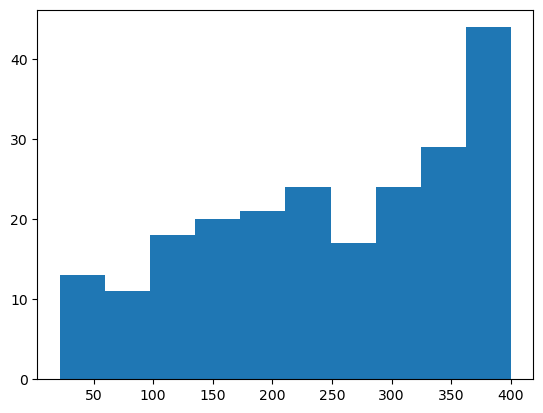

In [174]:
plt.hist(defense['toughest_min'])

In [175]:
#ranking within forwards toughest min
def calculate_percentile_rank(f_rank):
    
    percentile_rank = stats.percentileofscore(forward["toughest_min"], f_rank)
    return percentile_rank

f_rank =  1447.75 # Replace with the player's actual time on ice

percentile_rank = calculate_percentile_rank(f_rank)
print(f"The player's percentile rank among all players is: {percentile_rank}")

The player's percentile rank among all players is: 100.0


In [176]:
#Defensive Players
d_men = player_usage.query('Skater == "D"')
d_men = d_men[['Player', 'Team', 'QoCD','QoTD']]
d_men

,Player,Team,QoCD,QoTD
0,Drew Doughty,L.A,100.00,100.00
1,Erik Karlsson,S.J,99.54,100.00
2,Miro Heiskanen,DAL,99.07,100.00
3,Rasmus Dahlin,BUF,98.60,100.00
4,Devon Toews,COL,98.13,100.00
...,...,...,...,...
613,Scott Harrington,S.J,2.74,19.74
618,Nikita Zaitsev,OTT,2.25,23.99
620,Jacob MacDonald,COL,2.58,11.48
627,Cal Foote,T.B,2.81,13.37


In [177]:
#Young forwards
forwards = player_usage.query('Skater == "F"')
young_forwards = forwards.query('Age <=25')
young_forwards = young_forwards[['Player', 'Team', 'Position', 'GP', 'Age', 'TOI', 'QoCF', 'QoTF', 'w_QoCF', 'w_QoTF', 'toughest_min']]
young_forwards['young_percentile'] = round((young_forwards['TOI'].rank(pct=True))*100, 2)



In [178]:
result = d_men[d_men['QoCD']  < d_men['QoTD']]
result['diff'] = result['QoCD']-result['QoTD']
result.query('diff <= -25').sort_values(['diff'], ascending=[True])

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_19412\3699903389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['diff'] = result['QoCD']-result['QoTD']


,Player,Team,QoCD,QoTD,diff
103,David Savard,MTL,53.30,100.00,-46.70
486,Brad Hunt,COL,6.54,50.00,-43.46
135,Johnathan Kovacevic,MTL,50.00,88.89,-38.89
250,Ethan Bear,VAN,38.43,75.00,-36.57
191,Jordan Harris,MTL,42.92,77.78,-34.86
287,Erik Johnson,COL,35.51,70.00,-34.49
359,Bowen Byram,COL,27.57,60.00,-32.43
334,Tim Berni,CBJ,31.31,62.50,-31.19
123,Juuso Valimaki,ARI,58.33,88.89,-30.56
119,Trevor van Riemsdyk,WSH,59.07,88.89,-29.82


In [179]:
#seesaw
seesaw = d_men.query('Player == "Nick Jensen" or Player == "Justin Holl" or Player == "David Savard"')
seesaw = seesaw[['Player','Team', 'QoCD', 'QoTD']]
seesaw

,Player,Team,QoCD,QoTD
45,Nick Jensen,WSH,71.63,100.0
49,Justin Holl,TOR,75.00,100.0
103,David Savard,MTL,53.30,100.0


In [180]:
young_forwards.query('Player == "Alex DeBrincat"')

,Player,Team,Position,GP,Age,TOI,QoCF,QoTF,w_QoCF,w_QoTF,toughest_min,young_percentile


In [181]:
young_forwards['toughest_min'].mean()

163.07145454545454

In [182]:
forwards.query('Player == "Alex DeBrincat"')
pd.set_option('display.max_colwidth', None)


In [183]:
forwards.query('Player == "Alex DeBrincat"').describe()

,GP,TOI,Age,total_percentile,team_gp,team_TOI,QoTF,QoTD,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min
count,1.0,1.00,1.0,1.00,1.0,1.00,1.00,1.0,0.0,0.0,0.0,1.00,1.0,1.0,0.0,0.0,0.0,0.0,1.00
mean,82.0,1558.52,26.0,84.65,82.0,1558.52,93.33,75.0,NaN,NaN,NaN,93.18,70.7,1.0,NaN,NaN,NaN,NaN,332.21
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,82.0,1558.52,26.0,84.65,82.0,1558.52,93.33,75.0,NaN,NaN,NaN,93.18,70.7,1.0,NaN,NaN,NaN,NaN,332.21
25%,82.0,1558.52,26.0,84.65,82.0,1558.52,93.33,75.0,NaN,NaN,NaN,93.18,70.7,1.0,NaN,NaN,NaN,NaN,332.21
50%,82.0,1558.52,26.0,84.65,82.0,1558.52,93.33,75.0,NaN,NaN,NaN,93.18,70.7,1.0,NaN,NaN,NaN,NaN,332.21
75%,82.0,1558.52,26.0,84.65,82.0,1558.52,93.33,75.0,NaN,NaN,NaN,93.18,70.7,1.0,NaN,NaN,NaN,NaN,332.21
max,82.0,1558.52,26.0,84.65,82.0,1558.52,93.33,75.0,NaN,NaN,NaN,93.18,70.7,1.0,NaN,NaN,NaN,NaN,332.21


Bruins Free Agents:

1. Jesper Boqvist (RFA)
2. Jake DeBrusk (UFA)
3. Danton Heinen (UFA)
4. Pat Maroon (UFA)
5. JVR (UFA)
6. Matt Grzelcyk (UFA)
7. Derek Forbort (UFA)
8. Kevin Shattenkirk (UFA)

In [184]:
boston_roster = player_usage.query('Team == "BOS"')
boston_roster

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min
18,Hampus Lindholm,BOS,D,80,1854.95,30.0,96.81,D,80.0,1854.950000,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,100.00,90.23,1,BOS,NaN,NaN,NaN,NaN,390.23
61,David Pastrnak,BOS,R,82,1604.28,28.0,87.39,F,82.0,1604.280000,100.00,85.71,NaN,NaN,NaN,NaN,NaN,NaN,95.06,73.02,1,BOS,NaN,NaN,NaN,NaN,353.79
95,Charlie McAvoy,BOS,D,67,1494.30,26.0,79.18,D,67.0,1494.300000,93.75,85.71,NaN,NaN,NaN,NaN,NaN,NaN,87.76,64.65,1,BOS,NaN,NaN,NaN,NaN,331.87
143,Brandon Carlo,BOS,D,75,1412.30,27.0,72.95,D,75.0,1412.300000,93.75,71.43,NaN,NaN,NaN,NaN,NaN,NaN,82.35,58.14,1,BOS,NaN,NaN,NaN,NaN,305.67
168,Charlie Coyle,BOS,C,82,1392.88,32.0,70.82,F,82.0,1392.880000,93.75,57.14,NaN,NaN,NaN,NaN,NaN,NaN,80.94,56.28,1,BOS,NaN,NaN,NaN,NaN,288.11
184,Connor Clifton,BOS,D,78,1392.75,29.0,70.67,D,78.0,1392.750000,87.50,57.14,NaN,NaN,NaN,NaN,NaN,NaN,80.94,56.28,1,BOS,NaN,NaN,NaN,NaN,281.86
215,Patrice Bergeron,BOS,C,78,1356.55,38.0,67.33,F,78.0,1356.550000,87.50,42.86,NaN,NaN,NaN,NaN,NaN,NaN,78.59,53.49,1,BOS,NaN,NaN,NaN,NaN,262.44
221,Brad Marchand,BOS,L,73,1352.55,36.0,66.87,F,73.0,1352.550000,81.25,42.86,NaN,NaN,NaN,NaN,NaN,NaN,78.12,53.49,1,BOS,NaN,NaN,NaN,NaN,255.72
247,Pavel Zacha,BOS,C,82,1316.58,27.0,63.22,F,82.0,1316.580000,75.00,42.86,NaN,NaN,NaN,NaN,NaN,NaN,75.29,49.77,1,BOS,NaN,NaN,NaN,NaN,242.92
269,Matt Grzelcyk,BOS,D,75,1292.50,30.0,60.33,D,75.0,1292.500000,68.75,42.86,NaN,NaN,NaN,NaN,NaN,NaN,72.00,48.37,1,BOS,NaN,NaN,NaN,NaN,231.98


In [185]:
free_agents = boston_roster.query('Player == "Jesper Boqvist"or Player == "Jake DeBrusk" or Player == "Danton Heinen" or Player == "Matt Grzelcyk"')
free_agents

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min
269,Matt Grzelcyk,BOS,D,75,1292.5,30.0,60.33,D,75.0,1292.5,68.75,42.86,NaN,NaN,NaN,NaN,NaN,NaN,72.00,48.37,1,BOS,NaN,NaN,NaN,NaN,231.98
354,Jake DeBrusk,BOS,L,64,1073.7,27.0,44.38,F,64.0,1073.7,62.50,28.57,NaN,NaN,NaN,NaN,NaN,NaN,56.24,36.28,1,BOS,NaN,NaN,NaN,NaN,183.59


In [167]:
free_agents

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min
269,Matt Grzelcyk,BOS,D,75,1292.5,30.0,60.33,D,75.0,1292.5,68.75,42.86,NaN,NaN,NaN,NaN,NaN,NaN,72.00,48.37,1,BOS,NaN,NaN,NaN,NaN,231.98
354,Jake DeBrusk,BOS,L,64,1073.7,27.0,44.38,F,64.0,1073.7,62.50,28.57,NaN,NaN,NaN,NaN,NaN,NaN,56.24,36.28,1,BOS,NaN,NaN,NaN,NaN,183.59


In [168]:
#create a data set of other stats
performance = all_players
performance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            744 non-null    object 
 1   Team              744 non-null    object 
 2   Position          744 non-null    object 
 3   GP                744 non-null    int64  
 4   TOI               744 non-null    float64
 5   Age               743 non-null    float64
 6   total_percentile  744 non-null    float64
 7   Skater            744 non-null    object 
 8   team_gp           744 non-null    float64
 9   team_TOI          744 non-null    float64
 10  QoTF              744 non-null    float64
 11  QoTD              744 non-null    float64
 12  Team 1            170 non-null    object 
 13  Team 2            170 non-null    object 
 14  Team 3            170 non-null    object 
 15  team_TOI 1        170 non-null    float64
 16  team_TOI 2        170 non-null    float64
 1

In [169]:
# performance= performance[['Player', 'Position','Goals',
#        'Total Assists', 'First Assists', 'Second Assists', 'Total Points',
#        'IPP', 'Shots', 'SH%', 'ixG', 'iCF', 'iFF', 'iSCF', 'iHDCF',
#        'Rush Attempts', 'Rebounds Created', 'PIM', 'Total Penalties', 'Minor',
#        'Major', 'Misconduct', 'Penalties Drawn', 'Giveaways', 'Takeaways',
#        'Hits', 'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost',
#        'Faceoffs %']]
# performance.head()

performance = performance.merge(all_toi, on= ('Player', 'Position'), how = 'left' )
performance.head()

,Player,Team_x,Position,GP_x,TOI_x,Age_x,total_percentile_x,Skater_x,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,Team_y,GP_y,TOI_y,Age_y,total_percentile_y,Skater_y
0,Stefan Noesen,CAR,R,78,961.93,31.0,0.367781,F,78.0,961.93,35.714286,28.571429,NaN,NaN,NaN,NaN,NaN,NaN,49.292453,31.162791,1,CAR,CAR,78,961.93,31.0,0.367781,F
1,Matthew Tkachuk,FLA,L,79,1614.43,26.0,0.882979,F,79.0,1614.43,92.307692,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,96.009390,75.348837,1,FLA,FLA,79,1614.43,26.0,0.882979,F
2,Andrei Svechnikov,CAR,R,64,1155.08,24.0,0.496960,F,64.0,1155.08,50.000000,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,60.849057,40.000000,1,CAR,CAR,64,1155.08,24.0,0.496960,F
3,Jack Drury,CAR,C,38,409.83,24.0,0.025836,F,38.0,409.83,14.285714,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,8.018868,3.720930,1,CAR,CAR,38,409.83,24.0,0.025836,F
4,Jesper Bratt,N.J,L,82,1424.13,25.0,0.743161,F,82.0,1424.13,86.666667,42.857143,NaN,NaN,NaN,NaN,NaN,NaN,84.235294,59.345794,1,N.J,N.J,82,1424.13,25.0,0.743161,F


In [170]:
young_free_agents = free_agents[['QoCF', 'QoCD', 'QoTF', 'QoTD']]
young_free_agents

,QoCF,QoCD,QoTF,QoTD
269,72.00,48.37,68.75,42.86
354,56.24,36.28,62.50,28.57


In [186]:

free_agents['QoCF'] = pd.to_numeric(free_agents['QoCF'])  # Convert 'QoCF' column to numeric type
free_agents.set_index('Player', inplace=True)
free_agents = free_agents.sort_values(['QoCF', 'TOI'], ascending=[False, False])
free_agents

C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_19412\671476102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_agents['QoCF'] = pd.to_numeric(free_agents['QoCF'])  # Convert 'QoCF' column to numeric type


,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min
Player,,,,,,,,,,,,,,,,,,,,,,,,,,
Matt Grzelcyk,BOS,D,75,1292.5,30.0,60.33,D,75.0,1292.5,68.75,42.86,NaN,NaN,NaN,NaN,NaN,NaN,72.00,48.37,1,BOS,NaN,NaN,NaN,NaN,231.98
Jake DeBrusk,BOS,L,64,1073.7,27.0,44.38,F,64.0,1073.7,62.50,28.57,NaN,NaN,NaN,NaN,NaN,NaN,56.24,36.28,1,BOS,NaN,NaN,NaN,NaN,183.59


In [189]:
ages.query('Player == "Jake DeBrusk"')

,Player,Team,Position,Age
361,Jake DeBrusk,BOS,L,27


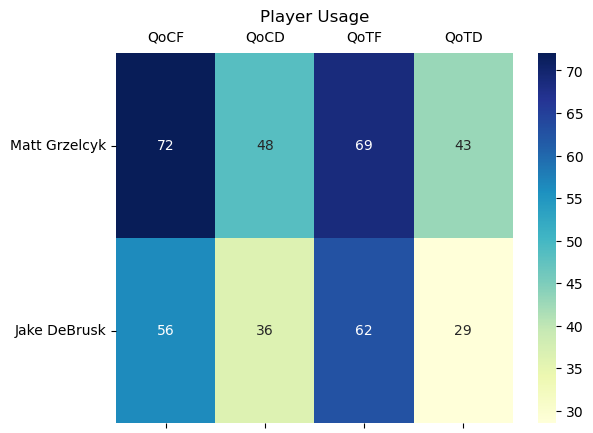

In [187]:
# Create the heatmap table
young_free_agents = free_agents[['QoCF', 'QoCD', 'QoTF', 'QoTD']]
sns.heatmap(young_free_agents, annot=True, cmap='YlGnBu', fmt='.0f', cbar=True)
plt.tick_params(axis='x', labelrotation=0, labeltop=True, labelbottom=False)
plt.tick_params(axis='y', labelrotation=360)
# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Player Usage')

# Display the plot
plt.show()

In [ ]:
#forwards who are of similar age to JD - 
 
young_forwards

In [ ]:
#Players similar age to JD

jd_f = forward.query('Age >=26 and Age < 28 ')
jd_f['Player'].unique()

In [ ]:
jd_f = jd_f.query('Position == "L" or Position == "R"')
jd_f = jd_f.query('team_count != "Multi"')



In [ ]:


jd_f['QoCF'] = pd.to_numeric(jd_f['QoCF'])  # Convert 'QoCF' column to numeric type
jd_f.set_index('Player', inplace=True)
jd_f = jd_f.sort_values(['QoCF', 'TOI'], ascending=[False, False])
jd_f

In [ ]:
# Create the heatmap table
jd_f = jd_f[['QoCF', 'QoCD', 'QoTF', 'QoTD']]

plt.figure(figsize=(14, 10)) 

sns.heatmap(jd_f, annot=True, cmap='YlGnBu', fmt='.0f', cbar=True)
plt.tick_params(axis='x', labelrotation=0, labeltop=True, labelbottom=False)
plt.tick_params(axis='y', labelrotation=360)
# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Player Usage')

# Display the plot
plt.show()

In [193]:
atlantic = forwards.query('Team == "BOS" or Team == "TOR" or Team == "OTT" or Team == "MTL" or Team == "DET" or Team == "BUF" or Team == "TBL" or Team == "FLA"')
atlantic

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min
23,Nick Suzuki,MTL,C,82,1729.83,24.0,94.53,F,82.0,1729.830000,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,99.29,84.43,1,MTL,NaN,NaN,NaN,NaN,383.72
26,Mitchell Marner,TOR,R,80,1702.10,27.0,93.62,F,80.0,1702.100000,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,99.06,82.41,1,TOR,NaN,NaN,NaN,NaN,381.47
61,David Pastrnak,BOS,R,82,1604.28,28.0,87.39,F,82.0,1604.280000,100.00,85.71,NaN,NaN,NaN,NaN,NaN,NaN,95.06,73.02,1,BOS,NaN,NaN,NaN,NaN,353.79
65,Tim Stützle,OTT,L,78,1658.67,22.0,90.73,F,78.0,1658.670000,100.00,75.00,NaN,NaN,NaN,NaN,NaN,NaN,97.41,78.60,1,OTT,NaN,NaN,NaN,NaN,351.01
82,William Nylander,TOR,R,82,1520.45,28.0,81.31,F,82.0,1520.450000,94.44,88.89,NaN,NaN,NaN,NaN,NaN,NaN,89.93,66.67,1,TOR,NaN,NaN,NaN,NaN,339.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,Filip Zadina,DET,R,30,392.90,24.0,2.28,F,30.0,392.900000,14.29,0.00,NaN,NaN,NaN,NaN,NaN,NaN,7.75,4.21,1,DET,NaN,NaN,NaN,NaN,26.25
642,Alex Belzile,MTL,R,31,376.15,32.0,1.82,F,31.0,376.150000,15.79,0.00,NaN,NaN,NaN,NaN,NaN,NaN,6.89,2.83,1,MTL,NaN,NaN,NaN,NaN,25.51
645,Rasmus Asplund,BUF,C,46,504.27,26.0,6.53,F,27.0,306.066667,13.04,7.59,BUF,NSH,0,306.066667,198.200000,0.0,3.27,0.57,1,Multi,3.27,0.57,13.04,7.59,24.47
651,Givani Smith,FLA,R,36,252.15,26.0,0.15,F,34.0,232.266667,14.73,0.00,FLA,DET,0,232.266667,19.883333,0.0,1.52,0.43,1,Multi,1.52,0.43,14.73,0.00,16.68


In [194]:
atlantic_tm=atlantic
atlantic_tm['tm_percentile'] = round(((atlantic['toughest_min'].rank(pct=True))*100),2)
atlantic_tm=atlantic_tm.sort_values(by=['tm_percentile'], ascending=[False]).reset_index(drop=True)


C:\Users\Karoline Sears\AppData\Local\Temp\ipykernel_19412\3890714320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlantic_tm['tm_percentile'] = round(((atlantic['toughest_min'].rank(pct=True))*100),2)


In [195]:
atlantic_tm.head(26)

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min,tm_percentile
0,Nick Suzuki,MTL,C,82,1729.83,24.0,94.53,F,82.0,1729.83,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,99.29,84.43,1,MTL,NaN,NaN,NaN,NaN,383.72,100.00
1,Mitchell Marner,TOR,R,80,1702.10,27.0,93.62,F,80.0,1702.10,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,99.06,82.41,1,TOR,NaN,NaN,NaN,NaN,381.47,98.92
2,David Pastrnak,BOS,R,82,1604.28,28.0,87.39,F,82.0,1604.28,100.00,85.71,NaN,NaN,NaN,NaN,NaN,NaN,95.06,73.02,1,BOS,NaN,NaN,NaN,NaN,353.79,97.85
3,Tim Stützle,OTT,L,78,1658.67,22.0,90.73,F,78.0,1658.67,100.00,75.00,NaN,NaN,NaN,NaN,NaN,NaN,97.41,78.60,1,OTT,NaN,NaN,NaN,NaN,351.01,96.77
4,William Nylander,TOR,R,82,1520.45,28.0,81.31,F,82.0,1520.45,94.44,88.89,NaN,NaN,NaN,NaN,NaN,NaN,89.93,66.67,1,TOR,NaN,NaN,NaN,NaN,339.93,95.70
5,Dylan Larkin,DET,C,80,1564.45,27.0,85.11,F,80.0,1564.45,100.00,75.00,NaN,NaN,NaN,NaN,NaN,NaN,93.43,70.56,1,DET,NaN,NaN,NaN,NaN,338.99,94.62
6,Alex DeBrincat,OTT,R,82,1558.52,26.0,84.65,F,82.0,1558.52,93.33,75.00,NaN,NaN,NaN,NaN,NaN,NaN,93.18,70.70,1,OTT,NaN,NaN,NaN,NaN,332.21,93.55
7,Auston Matthews,TOR,C,74,1500.60,26.0,79.48,F,74.0,1500.60,88.89,88.89,NaN,NaN,NaN,NaN,NaN,NaN,88.52,64.81,1,TOR,NaN,NaN,NaN,NaN,331.11,92.47
8,Claude Giroux,OTT,R,82,1541.27,36.0,83.43,F,82.0,1541.27,86.67,75.00,NaN,NaN,NaN,NaN,NaN,NaN,92.47,68.84,1,OTT,NaN,NaN,NaN,NaN,322.98,91.40
9,Sam Reinhart,FLA,C,82,1622.05,28.0,88.75,F,82.0,1622.05,100.00,50.00,NaN,NaN,NaN,NaN,NaN,NaN,96.01,76.28,1,FLA,NaN,NaN,NaN,NaN,322.29,90.32


In [196]:
atlantic_tm.query('Player == "Jake DeBrusk"')

,Player,Team,Position,GP,TOI,Age,total_percentile,Skater,team_gp,team_TOI,QoTF,QoTD,Team 1,Team 2,Team 3,team_TOI 1,team_TOI 2,team_TOI 3,QoCF,QoCD,team_no,team_count,w_QoCF,w_QoCD,w_QoTF,w_QoTD,toughest_min,tm_percentile
45,Jake DeBrusk,BOS,L,64,1073.7,27.0,44.38,F,64.0,1073.7,62.5,28.57,NaN,NaN,NaN,NaN,NaN,NaN,56.24,36.28,1,BOS,NaN,NaN,NaN,NaN,183.59,51.61


In [197]:
all_players

,Unnamed: 0,Player,Team,Position,GP,TOI,CF,CA,CF%,FF,FA,FF%,SF,SA,SF%,GF,GA,GF%,xGF,xGA,xGF%,SCF,SCA,SCF%,HDCF,HDCA,HDCF%,HDGF,HDGA,HDGF%,MDCF,MDCA,MDCF%,MDGF,MDGA,MDGF%,LDCF,LDCA,LDCF%,LDGF,LDGA,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts,Neu. Zone Starts,Def. Zone Starts,On The Fly Starts,Off. Zone Start %,Off. Zone Faceoffs,Neu. Zone Faceoffs,Def. Zone Faceoffs,Off. Zone Faceoff %
0,430,Cole Bardreau,NYI,C,1,6.616667,8,1,88.89,5,0,100.00,4,0,100.00,0,0,-,0.16,0.00,100.00,4,0,100.00,1,0,100.00,0,0,-,3,0,100.00,0,0,-,4,1,80.00,0,0,-,0.00,-,0.000,0,1,1,8,0.00,0,2,1,0.00
1,917,Matt Coronato,CGY,R,1,14.633333,28,9,75.68,18,6,75.00,15,4,78.95,1,0,100.00,0.75,0.57,56.85,12,4,75.00,2,0,100.00,0,0,-,10,4,71.43,0,0,-,12,4,75.00,1,0,100.00,6.67,100.00,1.067,2,3,0,13,100.00,10,5,2,83.33
2,419,Ondrej Kase,CAR,R,1,11.033333,26,9,74.29,21,8,72.41,9,6,60.00,0,0,-,1.18,0.35,76.91,8,4,66.67,4,1,80.00,0,0,-,4,3,57.14,0,0,-,17,2,89.47,0,0,-,0.00,100.00,1.000,10,2,3,5,76.92,15,3,4,78.95
3,61,Max Pacioretty,CAR,L,5,68.216667,109,44,71.24,79,32,71.17,47,24,66.20,3,2,60.00,5.56,4.00,58.17,48,17,73.85,21,8,72.41,1,2,33.33,27,9,75.00,2,0,100.00,56,21,72.73,0,0,-,6.38,91.67,0.980,24,15,4,39,85.71,34,21,14,70.83
4,585,Lucas Carlsson,FLA,D,2,20.183333,28,12,70.00,14,10,58.33,9,7,56.25,0,1,0.00,0.72,0.41,63.54,10,6,62.50,3,3,50.00,0,1,0.00,7,3,70.00,0,0,-,15,5,75.00,0,0,-,0.00,85.71,0.857,4,4,1,21,80.00,7,10,7,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,834,Vladislav Kolyachonok,ARI,D,2,27.516667,10,43,18.87,8,33,19.51,5,21,19.23,0,2,0.00,0.65,2.11,23.54,5,20,20.00,3,7,30.00,0,0,-,2,13,13.33,0,1,0.00,3,20,13.04,0,1,0.00,0.00,90.48,0.905,2,5,1,25,66.67,2,8,8,20.00
947,934,Owen Beck,MTL,C,1,9.800000,4,18,18.18,2,16,11.11,1,9,10.00,0,1,0.00,0.08,0.88,8.57,3,8,27.27,0,4,0.00,0,1,0.00,3,4,42.86,0,0,-,1,7,12.50,0,0,-,0.00,88.89,0.889,0,3,2,9,0.00,1,3,5,16.67
948,732,Filip Hallander,PIT,C,2,19.933333,5,24,17.24,5,16,23.81,2,9,18.18,0,0,-,0.15,1.11,11.94,2,11,15.38,1,5,16.67,0,0,-,1,6,14.29,0,0,-,3,10,23.08,0,0,-,0.00,100.00,1.000,3,8,2,18,60.00,3,8,4,42.86
949,689,Nick Swaney,MIN,R,1,9.550000,1,17,5.56,1,12,7.69,1,10,9.09,0,0,-,0.10,0.90,9.62,1,10,9.09,0,6,0.00,0,0,-,1,4,20.00,0,0,-,0,7,0.00,0,0,-,0.00,100.00,1.000,1,1,0,10,100.00,1,1,0,100.00


In [198]:
player_stats

,Player,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iHDCF,Rush Attempts,Rebounds Created,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,CF,CA,GF,GA,GF%,xGF,xGA,HDGF%,PDO
0,Connor McDavid,64,89,60,29,153,80.53,352,18.18,43.97,529,164,18,36,77,82,89,108,37,51.93,2240,1520,190,90,67.86,159.54,84.90,65.03,1.047
1,Leon Draisaitl,52,76,60,16,128,70.72,247,21.05,31.95,423,100,7,36,102,77,66,134,36,54.90,2071,1436,181,101,64.18,144.22,82.75,62.50,1.028
2,Nikita Kucherov,30,83,48,35,113,76.87,271,11.07,27.78,545,89,14,54,98,57,61,107,6,100.00,2082,1340,147,91,61.76,127.64,80.74,62.73,1.016
3,David Pastrnak,61,52,31,21,113,78.47,407,14.99,40.17,727,120,19,51,109,52,91,130,31,42.11,1909,1261,144,58,71.29,119.68,64.56,67.37,1.053
4,Nathan MacKinnon,42,69,42,27,111,76.03,366,11.48,32.26,629,99,16,36,47,43,53,73,33,44.43,2086,1251,146,66,68.87,117.29,67.80,68.87,1.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Marc McLaughlin,0,0,0,0,0,-,3,0.00,0.12,4,0,0,0,0,0,2,1,0,54.55,15,26,0,1,0.00,0.44,1.60,0.00,0.933
949,Owen Beck,0,0,0,0,0,-,0,-,0.06,1,0,0,0,0,0,0,0,1,33.33,4,18,0,1,0.00,0.08,0.88,0.00,0.889
950,David Jiricek,0,0,0,0,0,0.00,5,0.00,0.11,7,0,0,1,2,1,9,5,3,-,48,76,2,6,25.00,1.97,3.69,16.67,0.929
951,Marco Kasper,0,0,0,0,0,-,1,0.00,0.17,1,1,0,0,0,0,3,2,0,12.50,10,29,0,0,-,0.76,1.86,-,1.000


In [199]:
atlantic_tm=atlantic_tm[['Player', 'Team', 'Position', 'GP', 'TOI', 'Age', 'total_percentile', 'toughest_min', 'tm_percentile']]
atlantic_tm = atlantic_tm.merge(player_stats, on = 'Player', how = "left")

In [200]:
atlantic_tm.head(26).sort_values(by=['Rush Attempts'], ascending=[False]).reset_index(drop=True)

,Player,Team,Position,GP,TOI,Age,total_percentile,toughest_min,tm_percentile,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iHDCF,Rush Attempts,Rebounds Created,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,CF,CA,GF,GA,GF%,xGF,xGA,HDGF%,PDO
0,William Nylander,TOR,R,82,1520.45,28.0,81.31,339.93,95.70,40,47,27,20,87,67.44,293,13.65,34.52,516,140,21,35,37,70,18,98,25,42.37,1915,1277,129,65,66.49,128.61,69.41,69.52,1.024
1,Alex Tuch,BUF,R,74,1417.40,28.0,73.40,308.90,84.95,36,43,29,14,79,63.20,218,16.51,26.01,363,93,20,28,38,64,54,52,40,42.67,1618,1216,125,85,59.52,98.26,78.82,57.58,1.020
2,Claude Giroux,OTT,R,82,1541.27,36.0,83.43,322.98,91.40,35,44,27,17,79,73.15,214,16.36,21.97,357,95,20,21,32,52,75,52,27,58.31,1888,1373,108,80,57.45,114.80,78.31,60.95,1.002
3,David Pastrnak,BOS,R,82,1604.28,28.0,87.39,353.79,97.85,61,52,31,21,113,78.47,407,14.99,40.17,727,120,19,51,109,52,91,130,31,42.11,1909,1261,144,58,71.29,119.68,64.56,67.37,1.053
4,Dylan Cozens,BUF,C,81,1336.25,23.0,65.35,280.57,78.49,31,37,21,16,68,68.00,211,14.69,25.84,336,101,19,35,20,36,55,92,27,48.30,1397,1270,100,88,53.19,89.72,80.63,47.62,1.011
5,Brady Tkachuk,OTT,L,82,1527.83,24.0,82.22,313.97,87.10,35,48,29,19,83,64.84,347,10.09,49.89,559,240,19,57,51,30,242,93,9,48.37,2095,1207,128,86,59.81,139.40,69.16,60.34,0.988
6,Drake Batherson,OTT,R,82,1525.70,26.0,82.07,307.30,83.87,22,40,25,15,62,62.63,249,8.84,33.95,443,133,18,41,38,38,115,101,30,34.21,1904,1263,99,85,53.80,117.44,67.68,53.85,0.969
7,Matthew Tkachuk,FLA,L,79,1614.43,26.0,88.30,313.67,86.02,40,69,39,30,109,69.43,323,12.38,45.51,537,201,15,67,62,38,68,63,24,44.83,2434,1198,157,87,64.34,158.51,80.68,70.99,0.992
8,Sam Reinhart,FLA,C,82,1622.05,28.0,88.75,322.29,90.32,31,36,24,12,67,59.82,227,13.66,36.88,407,170,15,38,38,35,58,153,43,50.64,2020,1304,112,84,57.14,132.20,79.15,62.38,0.986
9,Tage Thompson,BUF,"C, R",78,1450.03,26.0,75.99,320.96,89.25,47,47,27,20,94,74.02,295,15.93,30.35,542,119,15,43,40,43,55,84,24,43.05,1740,1211,127,83,60.48,103.68,79.83,56.57,1.019


In [201]:
atlantic_tm.iloc[25:41].sort_values(by=['HDGF%'], ascending=[False]).reset_index(drop=True)

,Player,Team,Position,GP,TOI,Age,total_percentile,toughest_min,tm_percentile,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iHDCF,Rush Attempts,Rebounds Created,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,CF,CA,GF,GA,GF%,xGF,xGA,HDGF%,PDO
0,Brad Marchand,BOS,L,73,1352.55,36.0,66.87,255.72,73.12,21,46,31,15,67,64.42,183,11.48,20.13,335,76,8,20,84,42,81,99,20,38.60,1686,1077,104,42,71.23,101.83,60.14,68.57,1.044
1,Carter Verhaeghe,FLA,C,81,1417.67,28.0,73.63,253.58,70.97,42,31,14,17,73,73.00,275,15.27,31.70,470,119,8,45,56,35,29,106,21,48.78,1893,1225,100,69,59.17,110.88,76.08,65.43,0.999
2,David Krejci,BOS,C,70,1203.62,38.0,53.04,205.50,58.06,16,40,25,15,56,60.87,112,14.29,13.46,202,57,4,12,36,17,41,70,31,47.43,1253,1065,92,44,67.65,74.17,54.21,62.90,1.056
3,Eetu Luostarinen,FLA,C,82,1310.83,25.0,62.46,226.27,65.59,17,26,11,15,43,61.43,132,12.88,17.72,244,100,7,27,42,47,64,117,44,41.87,1261,1286,70,69,50.36,70.64,74.84,57.33,1.004
4,Lucas Raymond,DET,L,74,1285.82,22.0,59.73,246.66,68.82,17,28,12,16,45,60.00,134,12.69,16.48,245,72,7,23,27,33,43,96,18,29.41,1324,1058,75,61,55.15,72.47,56.87,56.72,1.001
5,Pavel Zacha,BOS,C,82,1316.58,27.0,63.22,242.92,67.74,21,36,18,18,57,64.77,131,16.03,16.25,220,71,9,13,35,31,67,63,18,45.27,1262,1172,88,55,61.54,68.53,56.42,56.52,1.038
6,Alexander Kerfoot,TOR,C,82,1198.75,29.0,52.74,218.79,63.44,10,22,12,10,32,60.38,133,7.52,15.04,221,72,7,13,38,45,54,186,41,44.83,1036,1070,53,54,49.53,55.00,57.52,55.56,0.997
7,Shane Pinto,OTT,C,82,1310.27,23.0,62.31,252.36,69.89,20,15,6,9,35,53.85,158,12.66,21.98,269,93,11,27,32,38,71,89,42,52.09,1394,1135,65,68,48.87,74.94,55.94,53.52,0.979
8,Kyle Okposo,BUF,R,75,1100.07,36.0,46.96,209.66,59.14,11,17,8,9,28,68.29,150,7.33,15.74,241,65,8,29,22,28,78,82,22,46.86,965,959,41,54,43.16,48.51,54.17,51.92,0.980
9,David Kampf,TOR,C,82,1255.22,29.0,57.45,254.28,72.04,7,20,10,10,27,60.00,107,6.54,12.90,171,60,4,17,30,57,74,136,26,51.53,913,1347,45,65,40.91,48.32,70.77,50.00,0.995


In [202]:
atlantic_tm.query('Player == "Jake DeBrusk"')

,Player,Team,Position,GP,TOI,Age,total_percentile,toughest_min,tm_percentile,Goals,Total Assists,First Assists,Second Assists,Total Points,IPP,Shots,SH%,ixG,iCF,iHDCF,Rush Attempts,Rebounds Created,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,CF,CA,GF,GA,GF%,xGF,xGA,HDGF%,PDO
45,Jake DeBrusk,BOS,L,64,1073.7,27.0,44.38,183.59,51.61,27,23,16,7,50,57.47,191,14.14,24.93,298,131,17,31,18,28,85,91,20,26.67,1367,829,87,38,69.60,80.28,40.6,66.67,1.031


In [203]:
#reltationship between tough min and goals scored?
atlantic_1 = atlantic_tm[['Player','toughest_min', 'Position', 'Goals', 'IPP', 'Total Points', 'SH%']]
atlantic_1=atlantic_1.rename(columns={'Total Points': 'Total_Points', 'SH%': 'SH_pct'})
atlantic_1.head()

,Player,toughest_min,Position,Goals,IPP,Total_Points,SH_pct
0,Nick Suzuki,383.72,C,26,64.08,66,16.05
1,Mitchell Marner,381.47,R,30,74.44,99,15.31
2,David Pastrnak,353.79,R,61,78.47,113,14.99
3,Tim Stützle,351.01,L,39,73.17,90,17.11
4,William Nylander,339.93,R,40,67.44,87,13.65


In [204]:
atlantic_1['intercept']=1
lm=sm.OLS(atlantic_1['Goals'], atlantic_1[['intercept', 'toughest_min']])
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Goals   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.20e-21
Time:                        22:08:27   Log-Likelihood:                -316.85
No. Observations:                  93   AIC:                             637.7
Df Residuals:                      91   BIC:                             642.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.1618      1.615     -0.719      0.474      -4.370       2.047
toughest_min     0.0966      0.008     12.594      0.000       0.081       0.112
==============================================================================
Omnibus:                       11.164   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.980
Skew:                           0.477   Prob(JB):                     0.000125
Kurtosis:                       4.932   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
atlantic_1.head()

,Player,toughest_min,Position,Goals,IPP,Total_Points,SH_pct,intercept
0,Nick Suzuki,383.72,C,26,64.08,66,16.05,1
1,Mitchell Marner,381.47,R,30,74.44,99,15.31,1
2,David Pastrnak,353.79,R,61,78.47,113,14.99,1
3,Tim Stützle,351.01,L,39,73.17,90,17.11,1
4,William Nylander,339.93,R,40,67.44,87,13.65,1


In [206]:
formula = 'Goals ~ toughest_min + Position + Total_Points'
model = smf.ols(formula=formula, data=atlantic_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Goals   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     92.90
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.96e-35
Time:                        22:08:31   Log-Likelihood:                -270.19
No. Observations:                  93   AIC:                             554.4
Df Residuals:                      86   BIC:                             572.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.2322      1.197  

In [207]:
# Define the coefficients
Intercept = -0.2322
Coeff_Position_L = 0.9452
Coeff_Position_R = 1.0738
Coeff_toughest_min = -0.0030
Coeff_Total_Points = 0.4278

# Create dummy variables for Position column
position_dummies = pd.get_dummies(atlantic_1['Position'], prefix='Position', drop_first=True)

# Concatenate the original DataFrame with the dummy variables
atlantic_1 = pd.concat([atlantic_1, position_dummies], axis=1)

atlantic_1['Predicted_Goals'] = (
    Intercept +
    (Coeff_Position_L * atlantic_1['Position_L']) +
    (Coeff_Position_R * atlantic_1['Position_R']) +
    (Coeff_toughest_min * atlantic_1['toughest_min']) +
    (Coeff_Total_Points * atlantic_1['Total_Points'])
)

atlantic_1

,Player,toughest_min,Position,Goals,IPP,Total_Points,SH_pct,intercept,"Position_C, L","Position_C, R",Position_L,Position_R,Predicted_Goals
0,Nick Suzuki,383.72,C,26,64.08,66,16.05,1,0,0,0,0,26.85144
1,Mitchell Marner,381.47,R,30,74.44,99,15.31,1,0,0,0,1,42.04939
2,David Pastrnak,353.79,R,61,78.47,113,14.99,1,0,0,0,1,48.12163
3,Tim Stützle,351.01,L,39,73.17,90,17.11,1,0,0,1,0,38.16197
4,William Nylander,339.93,R,40,67.44,87,13.65,1,0,0,0,1,37.04041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Filip Zadina,26.25,R,3,87.50,7,5.88,1,0,0,0,1,3.75745
89,Alex Belzile,25.51,R,6,73.68,14,15.00,1,0,0,0,1,6.75427
90,Rasmus Asplund,24.47,C,2,47.06,8,3.70,1,0,0,0,0,3.11679
91,Givani Smith,16.68,R,1,57.14,4,3.33,1,0,0,0,1,2.50276


In [208]:
atlantic_1.query('Player == "Jake DeBrusk"')

,Player,toughest_min,Position,Goals,IPP,Total_Points,SH_pct,intercept,"Position_C, L","Position_C, R",Position_L,Position_R,Predicted_Goals
45,Jake DeBrusk,183.59,L,27,57.47,50,14.14,1,0,0,1,0,21.55223
